<a href="https://colab.research.google.com/github/Cuong2812/Spam-Email-Detection-using-Naive-Bayes/blob/main/Spam_Mail_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
import csv
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import scikitplot as skplt
import nltk

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Data Collection & Pre-Processing

In [7]:
# loading the data from csv file to a pandas Dataframe
mail_data = pd.read_csv('mail_data.csv')

In [ ]:
print(mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [8]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

Word Cloud

In [10]:
ham_words = ''
spam_words = ''
# Creating a corpus of spam messages
for val in mail_data[mail_data['Category'] == 'spam'].Message:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
# Creating a corpus of ham messages
for val in mail_data[mail_data['Category'] == 'spam'].Message:
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

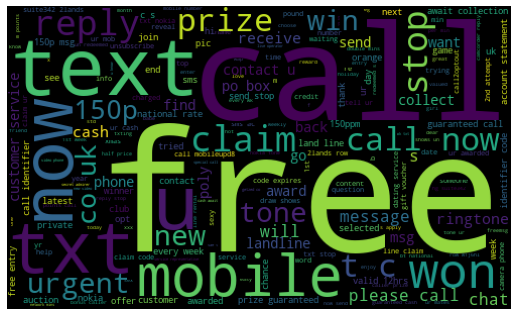

In [11]:
#Spam Word cloud
plt.figure( figsize=(7,7), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

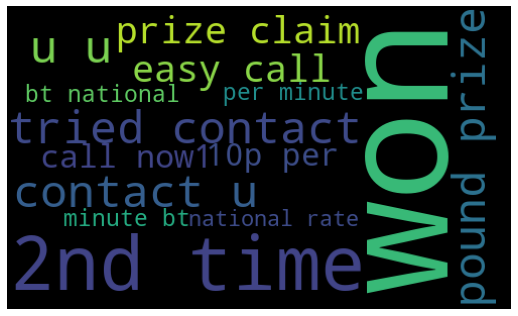

In [12]:
#Creating Ham wordcloud
plt.figure( figsize=(7,7), facecolor='w')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Label Encoding

In [13]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

spam  -  0

ham  -  1

In [14]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [15]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [16]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [17]:
print(mail_data['Category'].value_counts())

1    4825
0     747
Name: Category, dtype: int64


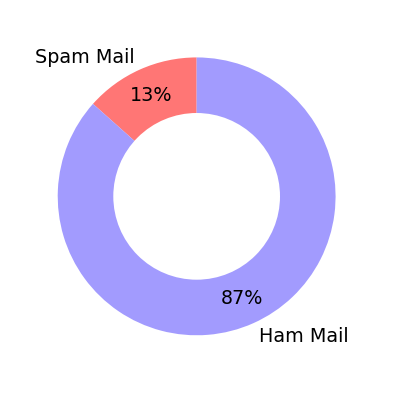

In [18]:
amount_of_spam = mail_data['Category'].value_counts()[0]
amount_of_ham = mail_data['Category'].value_counts()[1]
category_names = ['Spam Mail', 'Ham Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colors = ['#ff7675','#a29bfe']
plt.figure(figsize=(2,2), dpi = 230)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle = 90, autopct = '%1.0f%%', colors = custom_colors, pctdistance = 0.8)
centre_circle = plt.Circle((0,0), radius = 0.6, fc = 'white')
plt.gca().add_artist(centre_circle)
plt.show()

Splitting the data into training data & test data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

Feature Extraction

In [20]:
# transform the text data to feature vectors that can be used as input
count_vector = CountVectorizer(lowercase='True',min_df= 1, stop_words='english')
X_train_features = count_vector.fit_transform(X_train)
X_test_features = count_vector.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [21]:
print(X_train_features.shape)

(4457, 7431)


In [22]:
print(X_train_features)

  (0, 2329)	1
  (0, 3811)	1
  (0, 2224)	1
  (0, 4456)	1
  (0, 5413)	1
  (1, 3811)	1
  (1, 3046)	1
  (1, 1991)	1
  (1, 2956)	1
  (1, 2758)	1
  (1, 1839)	1
  (1, 918)	1
  (1, 2746)	1
  (1, 2957)	1
  (1, 3325)	1
  (1, 3185)	1
  (1, 4080)	1
  (2, 6601)	1
  (2, 2404)	1
  (2, 3156)	1
  (2, 407)	1
  (3, 7414)	1
  (3, 2870)	1
  (4, 2870)	3
  (4, 487)	1
  :	:
  (4454, 2855)	1
  (4454, 2246)	1
  (4455, 4456)	1
  (4455, 3922)	1
  (4455, 6916)	1
  (4455, 4715)	1
  (4455, 3872)	1
  (4455, 7113)	1
  (4455, 6091)	1
  (4455, 6810)	1
  (4455, 5646)	1
  (4455, 2469)	1
  (4455, 2247)	1
  (4456, 2870)	2
  (4456, 5778)	1
  (4456, 334)	1
  (4456, 6307)	1
  (4456, 6249)	1
  (4456, 7150)	2
  (4456, 7154)	1
  (4456, 6028)	1
  (4456, 5569)	2
  (4456, 6311)	1
  (4456, 647)	1
  (4456, 141)	1


Training the Model

In [23]:
# training the Naive Bayes model with the training data
NB_classifier=MultinomialNB(alpha=1, fit_prior='True')
NB_classifier.fit(X_train_features,Y_train)

MultinomialNB(alpha=1, fit_prior='True')

Extracting the Probability from the Model

In [24]:
prob_train = NB_classifier.predict_proba(X_train_features)
prob_spam_train = (prob_train[:,0])
prob_ham_train = (prob_train[:,1])

In [25]:
print(prob_spam_train)

[9.58464940e-04 1.03541237e-08 2.23693439e-02 ... 3.54685892e-03
 9.00419894e-09 1.00000000e+00]


In [26]:
print(prob_ham_train)

[9.99041535e-01 9.99999990e-01 9.77630656e-01 ... 9.96453141e-01
 9.99999991e-01 3.71076785e-13]


In [27]:
prob_test = NB_classifier.predict_proba(X_test_features)
prob_spam_test = (prob_test[:,0])
prob_ham_test = (prob_test[:,1])

In [28]:
print(prob_spam_test)

[1.00000000e+00 1.24053809e-06 1.00000000e+00 ... 6.36910495e-08
 4.36347311e-07 1.07300455e-01]


In [29]:
print(prob_ham_test)

[6.86718110e-17 9.99998759e-01 7.57874599e-12 ... 9.99999936e-01
 9.99999564e-01 8.92699545e-01]


Ploting Probability of Spam Email within the training data index

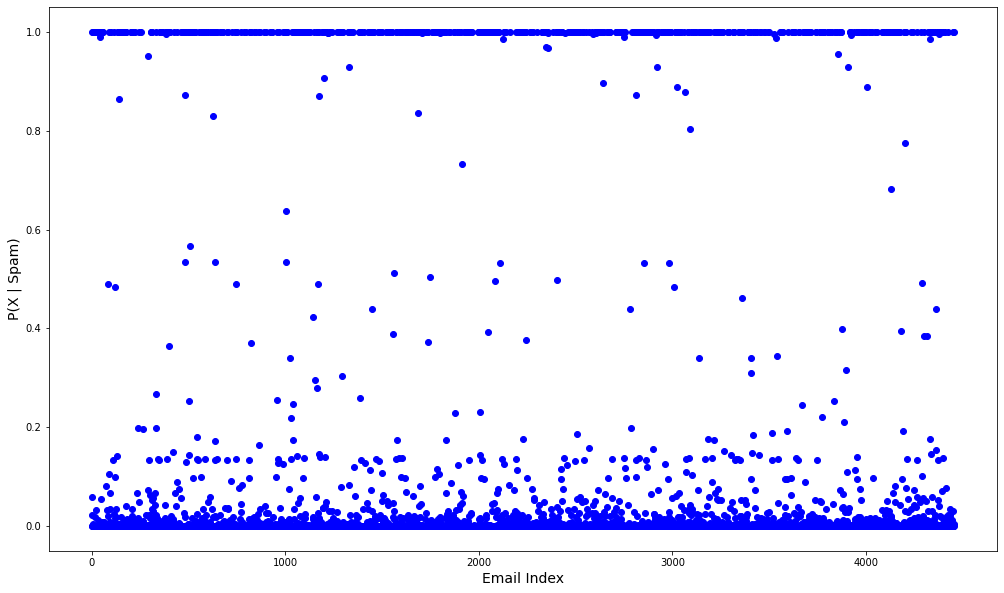

In [30]:
yaxis_label = 'P(X | Spam)'
xaxis_label = 'Email Index'
plt.figure(figsize=(17,10))
plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)
email_index=list(range(0,len(prob_spam_train)))
plt.scatter(email_index,prob_spam_train, color = 'blue')
plt.show()

**Evaluating**

Confusion Matrix of Model on Training Data

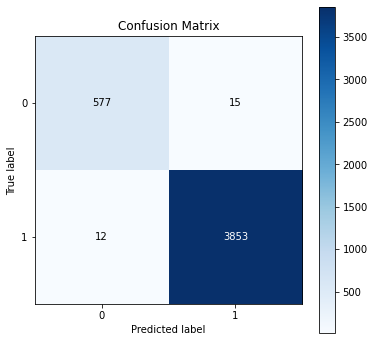

In [31]:
predict_train = NB_classifier.predict(X_train_features)
skplt.metrics.plot_confusion_matrix(Y_train, predict_train,figsize=(6,6))
plt.show()

Confusion Matrix of Model on Testing Data

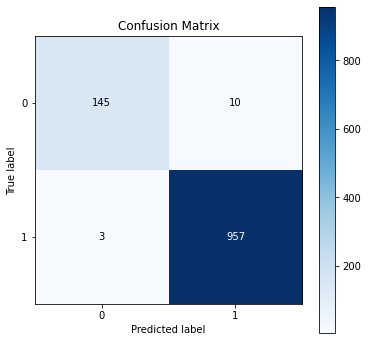

In [32]:
predict_test = NB_classifier.predict(X_test_features)
skplt.metrics.plot_confusion_matrix(Y_test, predict_test,figsize=(6,6))
plt.show()

Prediction on Training Data

In [33]:
print(classification_report(Y_train, predict_train))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       592
           1       1.00      1.00      1.00      3865

    accuracy                           0.99      4457
   macro avg       0.99      0.99      0.99      4457
weighted avg       0.99      0.99      0.99      4457



Prediction on Testing Data

In [34]:
print(classification_report(Y_test, predict_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       155
           1       0.99      1.00      0.99       960

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

